# Linear Regression Model

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing Data

In [5]:
df = pd.read_csv('../../Datasets/Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Probability Distribution

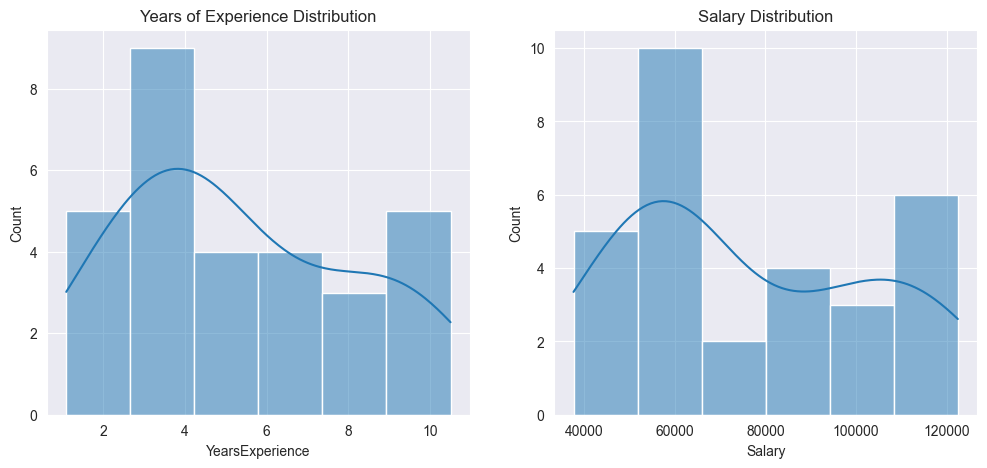

In [6]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df.iloc[:, 0], kde=True)
plt.title('Years of Experience Distribution')
plt.subplot(1, 2, 2)
sns.histplot(df.iloc[:, 1], kde=True)
plt.title('Salary Distribution')
plt.show()

## Correlation Analysis

                 YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000


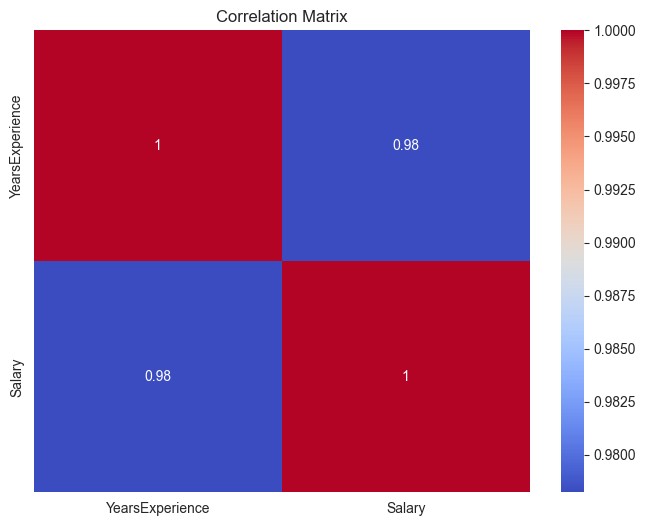

In [7]:
correlation_matrix = df.corr()
print(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [8]:
X = df.iloc[:,0].values
Y = df.iloc[:,1].values

## Splitting Data 

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3523)

In [10]:
X_train , X_test, Y_train = X_train.reshape(-1,1), X_test.reshape(-1,1), Y_train.reshape(-1,1)

## Training the Model

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## Plotting the Outcome

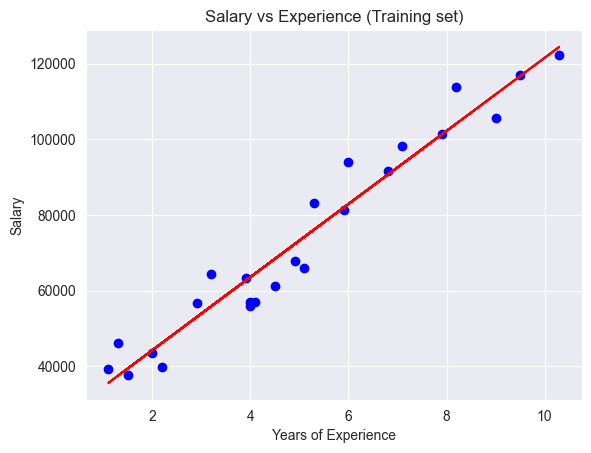

In [12]:
plt.scatter(X_train, Y_train, color='blue')
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [13]:
y_pred = regressor.predict(X_test)
for i in range(len(y_pred)):
    print("Predicted Salary:", y_pred[i][0], " | Actual Salary:", Y_test[i])

Predicted Salary: 117673.02424598401  | Actual Salary: 112635.0
Predicted Salary: 55844.20634094168  | Actual Salary: 54445.0
Predicted Salary: 108978.34672808743  | Actual Salary: 109431.0
Predicted Salary: 53912.0557814091  | Actual Salary: 60150.0
Predicted Salary: 126367.70176388061  | Actual Salary: 121872.0
Predicted Salary: 60674.58273977311  | Actual Salary: 57189.0


## RMSE R2 Score and Line Coefficients

In [14]:
from sklearn.metrics import r2_score, mean_squared_error
print("R2 Score:", r2_score(Y_test, y_pred))
print("Mean Squared Error:", np.sqrt(mean_squared_error(Y_test, y_pred)))

R2 Score: 0.9803904963545028
Mean Squared Error: 4058.2617611493556


In [15]:
print("Training Set Score: {:.4f}".format(regressor.score(X_train, Y_train)))
print("Testing Set Score: {:.4f}".format(regressor.score(X_test, Y_test)))

Training Set Score: 0.9468
Testing Set Score: 0.9804


In [16]:
a = regressor.coef_
b = regressor.intercept_
print("Equation of the line is: Y = {:.2f}X + {:.2f}".format(a[0][0], b[0]))
print(f"The Coefficient is: {a[0][0]}")
print(f"The Intercept is: {b[0]}")

Equation of the line is: Y = 9660.75X + 24929.80
The Coefficient is: 9660.752797662866
The Intercept is: 24929.797388420506


## Regression Analysis, Statistical Estimation, and Hypothesis Testing

In [17]:
import statsmodels.api as sm
# Reshape X to be 2D array for statsmodels
X_reshaped = X.reshape(-1, 1)
# Add a constant to the independent variable for the statsmodels OLS
X_stat = sm.add_constant(X_reshaped)
# Fit the OLS model
model_stat = sm.OLS(Y, X_stat).fit()
# Print the summary which includes Regression Analysis, Statistical Estimation, and Hypothesis Testing
print(model_stat.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 19 Feb 2026   Prob (F-statistic):           1.14e-20
Time:                        23:07:42   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.579e+04   2273.053     11.347      0.0